# Executive Summary
### Analysis of EPL Season Match Statistics

The objective of this project is to analyze match statistics from the 2022/2023 English Premier League (EPL) season and develop a predictive model for identifying which team performance metrics to focus on during training and games to impact game outcomes (win or loss). This analysis leverages historical data, advanced statistical methods, and machine learning algorithms to provide actionable insights for decision makers, analysts, and enthusiasts.

#### Key Findings

1. **Performance Metrics and Their Impact**:
   - Key performance indicators (KPIs) such as winning the first half, playing at home, and scoring more goals by full-time significantly influence match outcomes.
   - Goals scored (offensive success) and playing at home (morale) are the strongest predictors of a team's likelihood to win.
   - Top-performing teams exhibit superior metrics in both offense and defensive discipline, confirming the holistic nature of football strategy.<br><br>

2. **Predictive Modeling**:
   - A machine learning (logistic regression) model was trained on historical match data.
   - The refined model achieved an accuracy rate of approximately 86% in predicting match outcomes (win or loss) based on match performance metrics.<br><br>

3. **Team-Specific Insights**:
   - Detailed analysis for individual teams highlights specific strengths and weaknesses.
   - Recommendations for tactical adjustments are provided, aimed at improving performance in critical areas that impact match results.

#### Strategic Recommendations

1. **Data-Driven Decision Making**:
   - Teams should incorporate advanced analytics into their strategic planning and match preparation.
   - Real-time performance data should be used to make in-game adjustments and inform training focus areas.

2. **Focus on Key Metrics**:
   - Teams should prioritize improving key metrics that have the highest impact on winning probabilities.
   - Taking the lead early in games and extending that lead in the second half is crucial for consistent performance.

3. **Customized Strategies**:
   - Tailored strategies should be developed for each opponent and referee, leveraging insights from historical performance data.
   - Exploit opponent weaknesses while reinforcing team strengths.

4. **Continuous Monitoring and Adaptation**:
   - Regularly update predictive models with new data to maintain accuracy and relevance.
   - Adapt strategies dynamically based on evolving team performance and league trends.

#### Conclusion

The analysis of the 2022/2023 EPL season match statistics and the development of predictive models provide valuable insights into the determinants of match outcomes. By leveraging these insights, teams can enhance their performance, strategize more effectively, and ultimately increase their chances of winning. The adoption of data-driven approaches marks a significant step forward in the modern era of football management and competition.

This executive summary highlights the potential of advanced analytics in transforming football strategies and achieving success in the highly competitive environments.

## Load Required Libraries

In [1]:
install_and_load <- function(packages) {
    for (package in packages) {
        if (!require(package, character.only=T)) {
            install.packages(package, quiet=T)
            require(package, character.only=T)
        }
    }
}

packages <- c("dplyr", "tidyverse", "car", "MASS", "caret")

install_and_load(packages)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.2     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:dplyr’:

    recode


Lo

## Load Dataset
- In every English Premier League season, 20 football teams play against each other in a total of 38 games.
- This dataset contains matchday statistics for every game and every team during the 2022/2023 season.

In [2]:
data <- read.csv("~/Downloads/epl_results_2022-23.csv")

## Clean-up and Explore Data
- Renamed columns for ease of analysis.
- Data was gathered to duplicate games so that each row now corresponds to each team's performance per game.

In [3]:
# View first 3 rows of raw data
head(data, 2)

# Rename columns
colnames(data) <- c("date", "time", "home.team", "away.team",
                    "home.fulltime_goal", "away.fulltime_goal", "fulltime_outcome",
                    "home.halftime_goal", "away.halftime_goal", "halftime_outcome",
                    "referee", "home.shots", "away.shots",
                    "home.shots_ontarget", "away.shots_ontarget",
                    "home.foul", "away.foul", "home.corner", "away.corner",
                    "home.yellow", "away.yellow", "home.red", "away.red")

# Transform data
data_transformed <- data %>%
    gather(c(3,4,5,6,8,9,12:23), key="key", value="value") %>%
    separate(col="key", into=c("side", "name"), sep="\\.") %>%
    spread(key="name", value="value", convert=T) %>%
    mutate(fulltime_outcome=ifelse(fulltime_outcome=="D", "draw",
                                   ifelse((fulltime_outcome=="A" & side=="away")|
                                          (fulltime_outcome=="H" & side=="home"), "win",
                                          "loss")),
           halftime_outcome=ifelse(halftime_outcome=="D", "draw",
                                   ifelse((halftime_outcome=="A" & side=="away")|
                                          (fulltime_outcome=="H" & side=="home"), "win",
                                          "loss")))

# View first 3 rows of transformed data
head(data_transformed, 2)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,⋯,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,⋯,2,2,16,11,3,5,1,2,0,0
2,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,⋯,3,4,7,9,4,4,2,0,0,0


,date,time,fulltime_outcome,halftime_outcome,referee,side,corner,foul,fulltime_goal,halftime_goal,red,shots,shots_ontarget,team,yellow
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
1,01/01/2023,14:00,win,draw,J Brooks,away,3,10,2,0,0,13,4,Aston Villa,3
2,01/01/2023,14:00,loss,draw,J Brooks,home,5,15,0,0,0,6,2,Tottenham,4


## Performance Metrics

### League Table
- Ranked teams by points earned during the 2022/2023 season:
- Man City gathered the most points and therefore won the league, followed by Arsenel and Man United.
- Southampton finished bottom of the league, followed by Leeds, and Leicester.

In [4]:
# Transform data
league_table <- data_transformed %>%
    group_by(team, fulltime_outcome) %>%
    summarise(count=n(), .groups="drop") %>%
    spread(key="fulltime_outcome", value="count") %>%
    mutate(points=(draw*1)+(loss*0)+(win*3)) %>%
    arrange(desc(points)) %>%
    as.data.frame()

# View transformed table
head(league_table, 20)

,team,draw,loss,win,points
,<chr>,<int>,<int>,<int>,<dbl>
1,Man City,5,5,28,89
2,Arsenal,6,6,26,84
3,Man United,6,9,23,75
4,Newcastle,14,5,19,71
5,Liverpool,10,9,19,67
6,Brighton,8,12,18,62
7,Aston Villa,7,13,18,61
8,Tottenham,6,14,18,60
9,Brentford,14,9,15,59


### Full-time Results
- The teams that won the most and lost the least matches, gathered the most points and finished top of the table.
- Managements should create a winning mindset in their teams as draws can be almost as detrimental as losses.

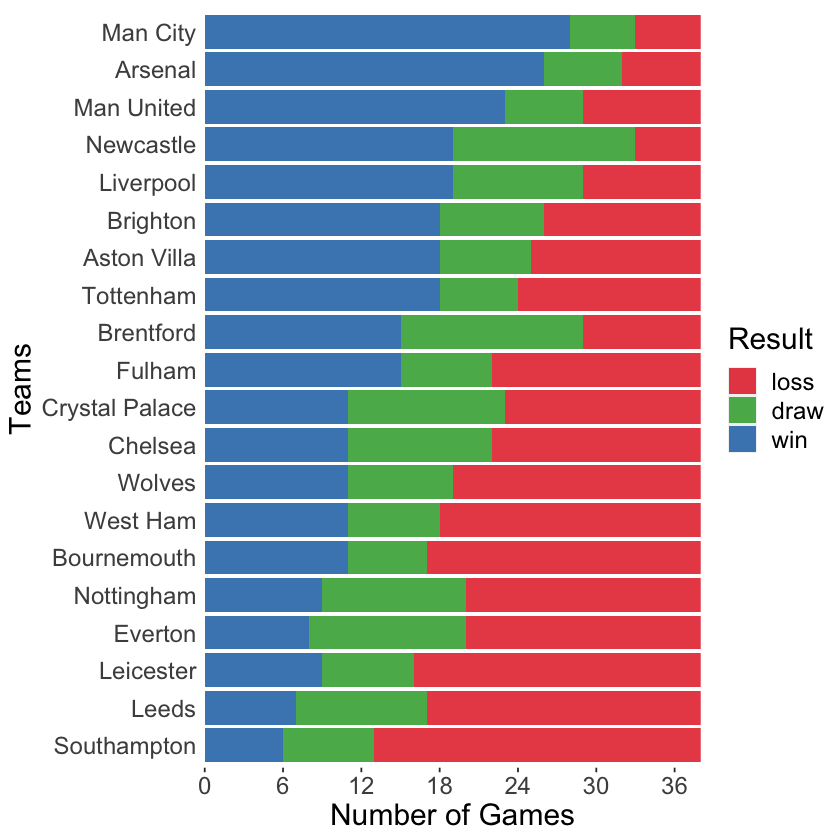

In [5]:
league_table %>%
    gather(2:4, key="result", value="count") %>%
    mutate(result=factor(result, levels=c("loss", "draw", "win"))) %>%
    ggplot() +
        geom_col(aes(y=reorder(team, points), x=count, fill=result)) +
        scale_x_continuous(expand=c(0,0), breaks=seq(0, 38, 6)) +
        scale_fill_manual(values=c("#e3221ccc", "#4caf4aee", "#377eb8ee")) +
        labs(x="Number of Games", y="Teams", fill="Result") +
        theme(axis.ticks.y=element_blank(), panel.grid=element_blank(),
              panel.border=element_blank(), panel.background=element_blank(),
              text=element_text(size=18))

### Half-time Results
- Teams were sorted by league standing.
- Half-time results had little bearing on league standing at end of season.
- Top teams were able to turn around half-time results by full-time.

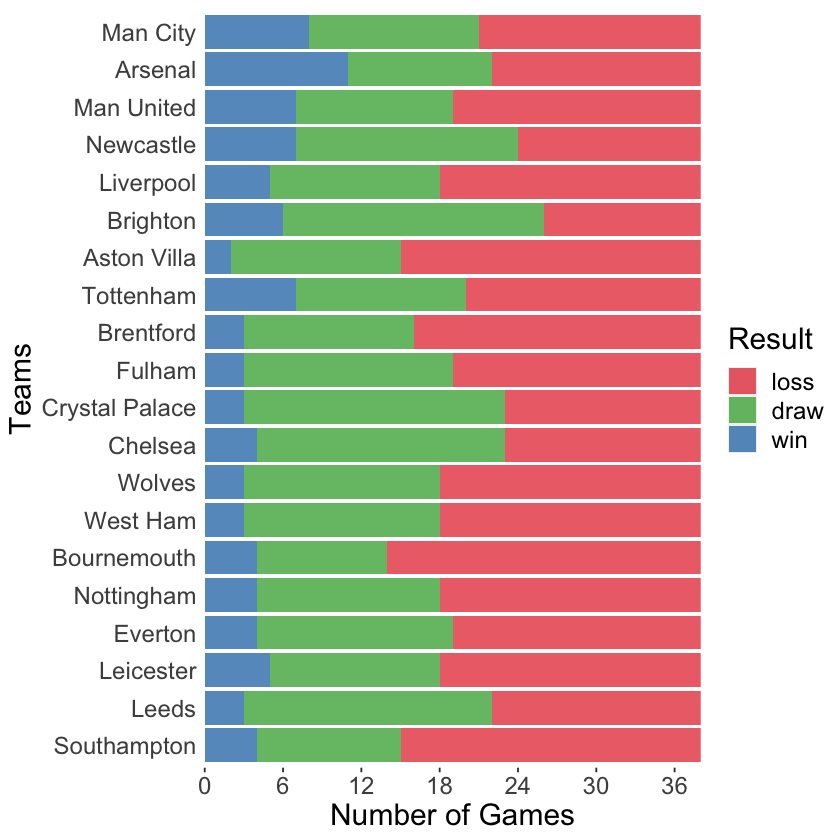

In [6]:
data_transformed %>%
    group_by(team, halftime_outcome) %>%
    summarise(count=n(), .groups = 'drop') %>%
    spread(key="halftime_outcome", value="count") %>%
    left_join(league_table[, c("team", "points")], by="team") %>%
    gather(2:4, key="result", value="count") %>%
    mutate(result=factor(result, levels=c("loss", "draw", "win"))) %>%
    ggplot() +
        geom_col(aes(y=reorder(team, points), x=count, fill=result)) +
        scale_x_continuous(expand=c(0,0), breaks=seq(0, 38, 6)) +
        scale_fill_manual(values=c("#e3221caa", "#4caf4acc", "#377eb8cc")) +
        labs(x="Number of Games", y="Teams", fill="Result") +
        theme(axis.ticks.y=element_blank(), panel.grid=element_blank(),
              panel.border=element_blank(), panel.background=element_blank(),
              text=element_text(size=18))

### First and Second Half Goals
- The teams that finished top 2 in points scored the most goals in both the first and second halves.
- Most teams scored more in the second than in the first half.
- Scoring more goals did not always mean a team would finish higher than teams that scored less.

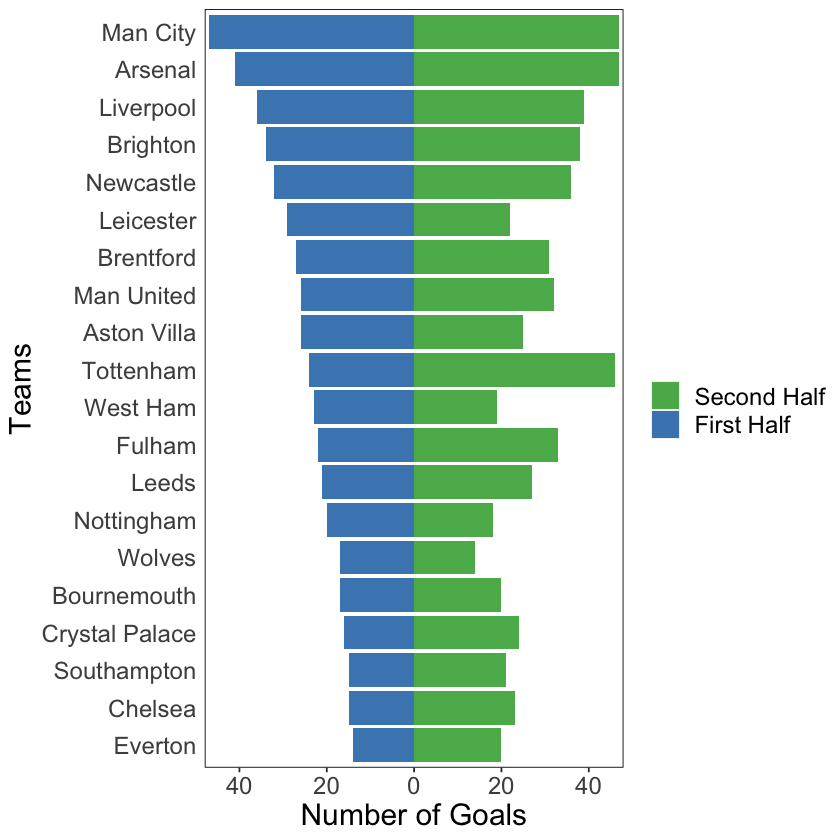

In [7]:
data_transformed %>%
    mutate(secondhalf_goal=fulltime_goal-halftime_goal,
          halftime_goal=-halftime_goal) %>%
    dplyr::select(team, secondhalf_goal, halftime_goal) %>%
    group_by(team) %>%
    mutate(totals=-sum(halftime_goal)) %>%
    gather(2:3, key="period", value="goals") %>%
    mutate(period=ifelse(period=="secondhalf_goal", "Second Half", "First Half")) %>%
    left_join(league_table[, c("team", "points")], by="team") %>%
    mutate(period=factor(period, levels=c("Second Half", "First Half"))) %>%
    ggplot() +
        geom_col(aes(y=reorder(team, totals), x=goals, fill=period)) +
        scale_x_continuous(expand=c(.01,.01), breaks=seq(-80, 80, 20),
                          labels=abs(seq(-80, 80, 20))) +
        scale_fill_manual(values=c("#4caf4aee", "#377eb8ee")) +
        labs(x="Number of Goals", y="Teams", fill="") +
        theme(axis.ticks.y=element_blank(), panel.border=element_rect(fill=NA),
              panel.background=element_blank(), text=element_text(size=18))

### Offensive Accuracy
- Shooting Accuracy was calculated as **Shots on Target ÷ Shots Taken**.
- Shooting Success was calculated as **Goals Scored ÷ Shot on Target**.
- The teams that enjoyed the most success in scoring were not the most accurate in their attempts.

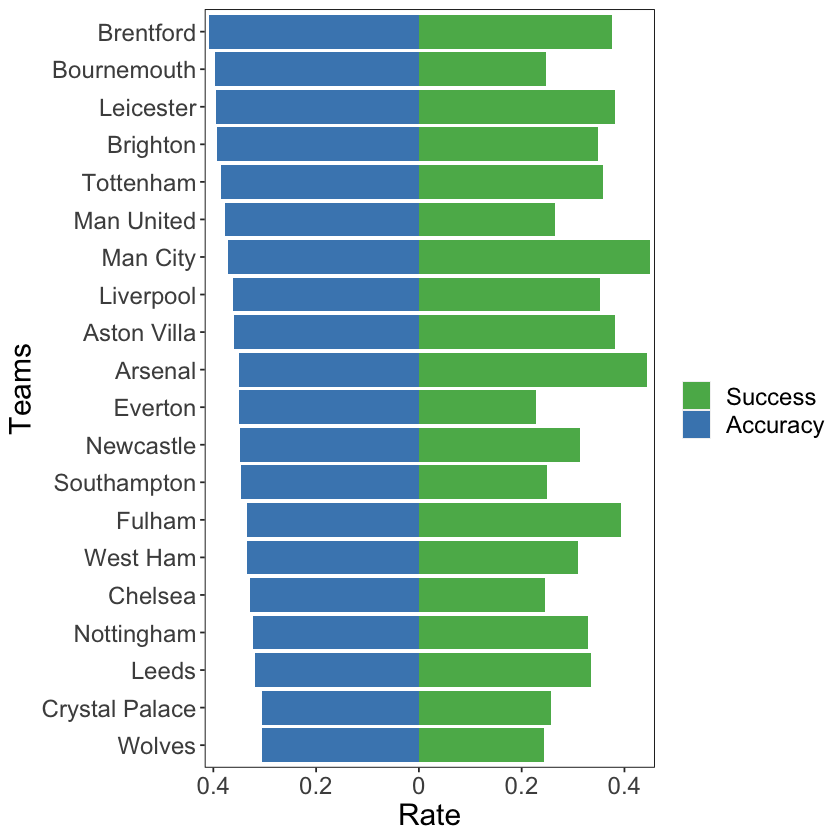

In [8]:
data_transformed %>%
    mutate(shooting_accuracy=shots_ontarget/ifelse(shots==0, 1, shots),
          shooting_success=fulltime_goal/ifelse(shots_ontarget==0, 1, shots_ontarget),
          Accuracy=shooting_accuracy) %>%
    group_by(team) %>%
    summarise(shooting_accuracy=-mean(shooting_accuracy),
             shooting_success=mean(shooting_success),
             Accuracy=mean(Accuracy)) %>%
    gather(2:3, key="outcome", value="shots") %>%
    left_join(league_table[, c("team", "points")], by="team") %>%
    mutate(outcome=ifelse(outcome=="shooting_accuracy",
                          "Accuracy", "Success"),
          outcome=factor(outcome, levels=c("Success", "Accuracy"))) %>%
    ggplot(aes(y=reorder(team, Accuracy), x=shots, fill=outcome)) +
        geom_col() +
        scale_x_continuous(expand=c(0.01,0), breaks=seq(-1, 1, 0.2),
                           labels=abs(seq(-1, 1, 0.2))) +
        scale_fill_manual(values=c("#4caf4aee", "#377eb8ee")) +
        labs(x="Rate", y="Teams", fill="") +
        theme(panel.border=element_rect(fill=NA),
              panel.background=element_blank(), text=element_text(size=18))

### Home Advantage
- Top teams won most of their home games and more away games than mid-table and bottom teams.
- Bottom teams were unable to take advantage of their home advantage.

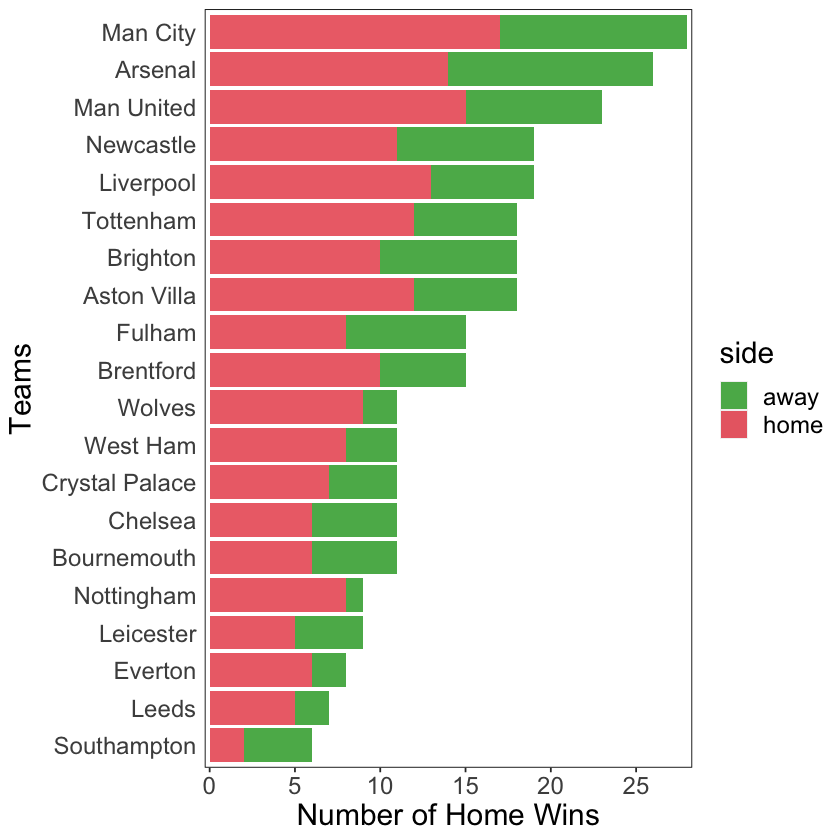

In [9]:
data_transformed %>%
    filter(fulltime_outcome=="win") %>%
    group_by(team, side) %>%
    summarise(count=n(), .groups = 'drop') %>%
    ggplot() +
        geom_col(aes(y=reorder(team, count), x=count, fill=side)) +
        scale_x_continuous(expand=c(.01,.01), breaks=seq(0, 60, 5)) +
        scale_fill_manual(values=c("#4caf4aee", "#e3221caa")) +
        labs(x="Number of Home Wins", y="Teams") +
        theme(axis.ticks.y=element_blank(), panel.border=element_rect(fill=NA),
              panel.background=element_blank(), text=element_text(size=18))

### Fouls
- The best 2 teams conceded fewer fouls.
- Wolves conceded the most fouls.
- Fewer fouls did not always translate to better performance.

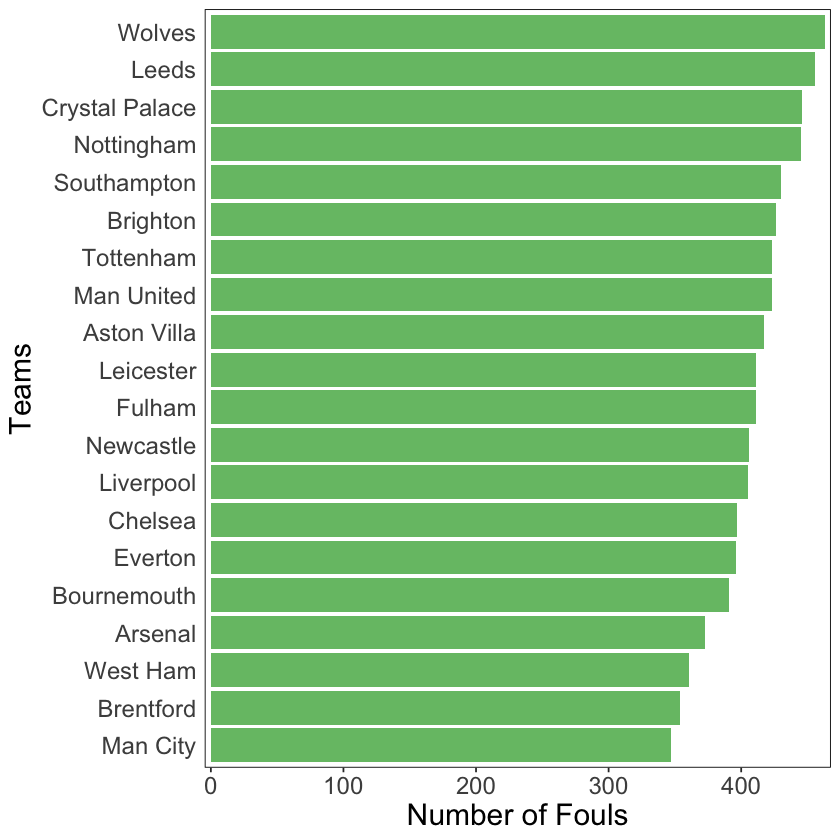

In [10]:
data_transformed %>%
    left_join(league_table[, c("team", "points")], by="team") %>%
    group_by(team) %>%
    mutate(totals=sum(foul)) %>%
    ggplot() +
        geom_col(aes(y=reorder(team, totals), x=foul), fill="#4caf4acc") +
        scale_x_continuous(expand=c(.01,.01), breaks=seq(0, 1000, 100)) +
        labs(x="Number of Fouls", y="Teams") +
        theme(axis.ticks.y=element_blank(), panel.border=element_rect(fill=NA),
              panel.background=element_blank(), text=element_text(size=18))

## Penalties Conceded

### Yellow and Red Cards
- The best 2 teams received fewer cards.
- Wolves receive the most yellow and red cards, respectively.
- Fewer cautions did not always mean a team would finish higher than teams that received more cautions.

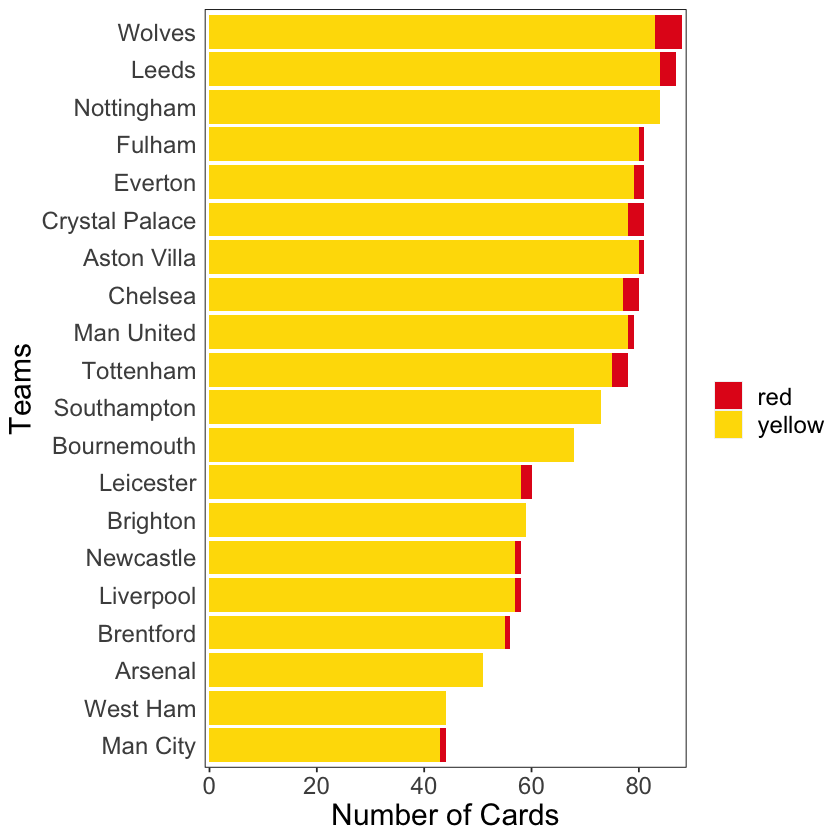

In [11]:
data_transformed %>%
    dplyr::select(team, yellow, red) %>%
    gather(2:3, key="color", value="cards") %>%
    group_by(team) %>%
    left_join(league_table[, c("team", "points")], by="team") %>%
    mutate(color=factor(color, levels=c("red", "yellow")),
          totals=sum(cards)) %>%
    ggplot() +
        geom_col(aes(y=reorder(team, totals), x=cards, fill=color)) +
        scale_x_continuous(expand=c(.01,.01), breaks=seq(0, 100, 20)) +
        scale_fill_manual(values=c("#e3221cff", "#fedc00ff")) +
        labs(x="Number of Cards", y="Teams", fill="") +
        theme(axis.ticks.y=element_blank(), panel.border=element_rect(fill=NA),
              panel.background=element_blank(), text=element_text(size=18))

## Referees 

### Yellow and Red Cards
- Some referees award more cards than other referees.
- Teams should adjust their defensive strategies accordingly.

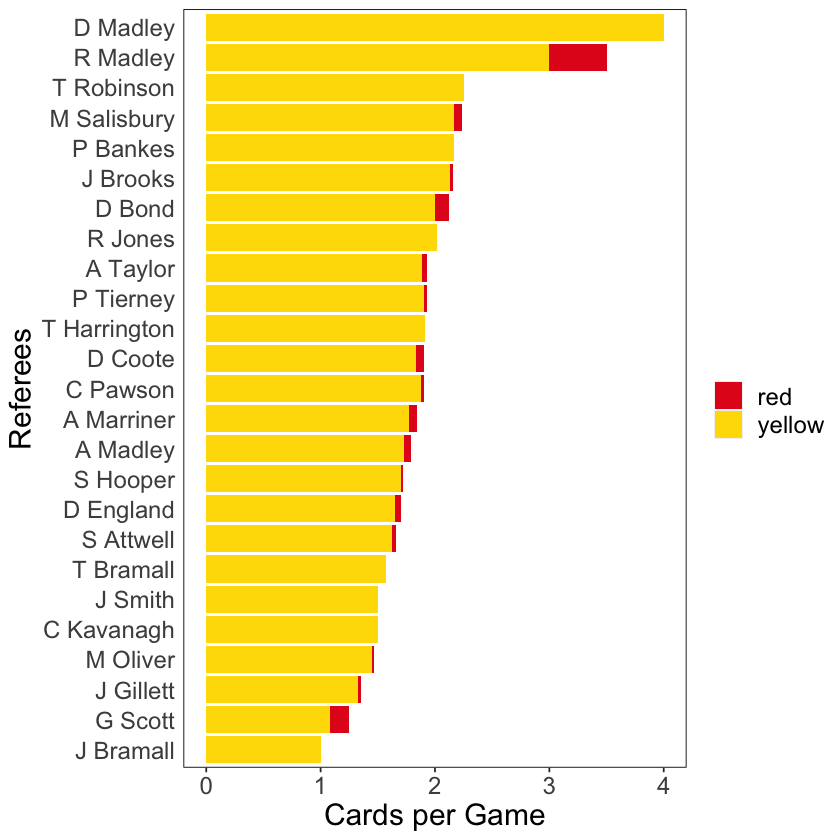

In [12]:
data_transformed %>%
    dplyr::select(referee, yellow, red) %>%
    gather(2:3, key="color", value="cards") %>%
    mutate(color=factor(color, levels=c("red", "yellow"))) %>%
    group_by(referee, color) %>%
    summarise(cpg=sum(cards)/n(), totals=sum(cpg), .groups = 'drop') %>%
    ggplot() +
        geom_col(aes(y=reorder(referee, totals), x=cpg, fill=color)) +
        scale_fill_manual(values=c("#e3221cff", "#fedc00ff")) +
        labs(x="Cards per Game", y="Referees", fill="") +
        theme(axis.ticks.y=element_blank(), panel.border=element_rect(fill=NA),
              panel.background=element_blank(), text=element_text(size=18))

## Which Team Metrics Impacted Game Outcomes the Most?

### Logistic Regression Modelling
- Built a logistic regression model for predicting full-time outcomes (win or loss) based on match metrics.
- Model suggests that winning the first half, playing at home, and scoring more goals impacted match outcomes the most.

In [13]:
data_transformed <- data_transformed %>%
    filter(fulltime_outcome!="draw") %>%
    mutate(fulltime_outcome=factor(fulltime_outcome, levels=c("win", "loss")))

logistic_model <- glm(fulltime_outcome ~ halftime_outcome + referee + side + corner + foul + fulltime_goal + halftime_goal + red + shots + shots_ontarget + yellow, data=data_transformed, family=binomial)

summary(logistic_model)


Call:
glm(formula = fulltime_outcome ~ halftime_outcome + referee + 
    side + corner + foul + fulltime_goal + halftime_goal + red + 
    shots + shots_ontarget + yellow, family = binomial, data = data_transformed)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           5.80058    1.04622   5.544 2.95e-08 ***
halftime_outcomeloss  1.25867    0.33827   3.721 0.000199 ***
halftime_outcomewin  -1.89911    0.54902  -3.459 0.000542 ***
refereeA Marriner     0.78501    1.00764   0.779 0.435946    
refereeA Taylor       1.24706    0.82763   1.507 0.131868    
refereeC Kavanagh     0.14842    0.87257   0.170 0.864933    
refereeC Pawson      -0.02183    0.87093  -0.025 0.980005    
refereeD Bond        -0.77495    1.74185  -0.445 0.656390    
refereeD Coote       -0.33963    0.92473  -0.367 0.713411    
refereeD England      0.56945    0.99480   0.572 0.567036    
refereeD Madley      -2.76329    2.50009  -1.105 0.269040    
refereeG Scott        0.

### Feature Selection
- Performed stepwise selection using AIC to simplify model
- Removing `referee`, `corner`, and `yellow` as predictor variables effectively decreased AIC from 397.87 to 368.75.

In [14]:
stepwise_model <- stepAIC(logistic_model, direction="both")

summary(stepwise_model)

Start:  AIC=397.87
fulltime_outcome ~ halftime_outcome + referee + side + corner + 
    foul + fulltime_goal + halftime_goal + red + shots + shots_ontarget + 
    yellow

                   Df Deviance    AIC
- referee          21   347.47 371.47
- corner            1   332.22 396.22
- yellow            1   332.33 396.33
<none>                  331.87 397.87
- foul              1   334.81 398.81
- red               1   334.89 398.89
- halftime_goal     1   335.27 399.27
- shots_ontarget    1   335.71 399.71
- shots             1   337.94 401.94
- halftime_outcome  2   371.48 433.48
- side              1   373.65 437.65
- fulltime_goal     1   526.61 590.61

Step:  AIC=371.47
fulltime_outcome ~ halftime_outcome + side + corner + foul + 
    fulltime_goal + halftime_goal + red + shots + shots_ontarget + 
    yellow

                   Df Deviance    AIC
- corner            1   348.05 370.05
- yellow            1   348.12 370.12
<none>                  347.47 371.47
- halftime_goal     1 


Call:
glm(formula = fulltime_outcome ~ halftime_outcome + side + foul + 
    fulltime_goal + halftime_goal + red + shots + shots_ontarget, 
    family = binomial, data = data_transformed)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           5.61431    0.77781   7.218 5.27e-13 ***
halftime_outcomeloss  1.09525    0.31337   3.495 0.000474 ***
halftime_outcomewin  -1.89063    0.51305  -3.685 0.000229 ***
sidehome             -2.10168    0.35024  -6.001 1.96e-09 ***
foul                 -0.10254    0.04072  -2.518 0.011799 *  
fulltime_goal        -2.59576    0.26099  -9.946  < 2e-16 ***
halftime_goal         0.51119    0.26891   1.901 0.057306 .  
red                   1.80009    0.78694   2.287 0.022169 *  
shots                -0.11949    0.03760  -3.178 0.001484 ** 
shots_ontarget        0.20153    0.09366   2.152 0.031410 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family take

### Model Performance
- A confusion matrix was used to evaluate the model's performance.
- The model demonstrates strong performance with high accuracy (86.01%), precision (86.25%) and balanced sensitivity (85.67%) and specificity (86.35%).
- The Kappa value (0.7201) and very low p-value (< 2e−16) confirm the model's performance is significantly better than chance.

In [15]:
predictions <- predict(stepwise_model, type="response")

predicted_classes <- ifelse(predictions < 0.5, "win", "loss")

data_transformed$fulltime_outcome <- factor(data_transformed$fulltime_outcome)

data_transformed$predicted_outcome <- factor(predicted_classes,
                                            levels=levels(data_transformed$fulltime_outcome))

conf_matrix <- confusionMatrix(data=data_transformed$predicted_outcome,
                               reference=data_transformed$fulltime_outcome)

print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction win loss
      win  251   40
      loss  42  253
                                          
               Accuracy : 0.8601          
                 95% CI : (0.8293, 0.8871)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7201          
                                          
 Mcnemar's Test P-Value : 0.9121          
                                          
            Sensitivity : 0.8567          
            Specificity : 0.8635          
         Pos Pred Value : 0.8625          
         Neg Pred Value : 0.8576          
             Prevalence : 0.5000          
         Detection Rate : 0.4283          
   Detection Prevalence : 0.4966          
      Balanced Accuracy : 0.8601          
                                          
       'Positive' Class : win             
                           

- A residual analysis was performed to evaluate the model's performance.
- Logistic regression model is appropriate for the dataset.
- There are no significant issues with model fit.

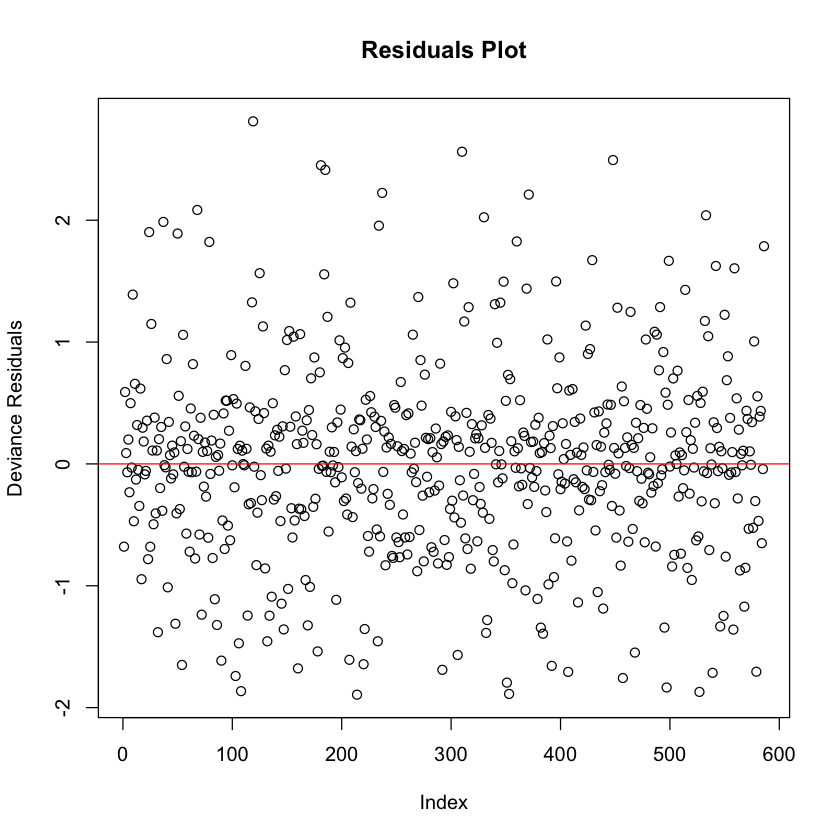

In [16]:
residuals <- residuals(stepwise_model, type="deviance")

plot(residuals, main="Residuals Plot", xlab="Index", ylab="Deviance Residuals")

abline(h=0, col="red")